<a href="https://colab.research.google.com/github/mj291001/Challenge-Telecom-X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X**

## **Extracción de datos**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
url = 'https://raw.githubusercontent.com/mj291001/Challenge-Telecom-X/refs/heads/main/TelecomX_Data.json'

clientes = pd.read_json(url)

clientes.sample(10)


,customerID,Churn,customer,phone,internet,account
328,0480-BIXDE,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5900,8063-GBATB,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3965,5419-KLXBN,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2817,3904-UKFRE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6019,8219-VYBVI,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
3485,4818-DRBQT,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5405,7395-IGJOS,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7199,9904-EHEVJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2841,3943-KDREE,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4954,6769-DCQLI,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


## **Transformación de datos**

Se "normalizan" los datos de las columnas, se analiza cada "sub-columna" eliminando datos nulos o espacios vacíos, colocando el Dtype correspondiente a cada columna y conservando columnas importantes en el análisis.

In [53]:
clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [54]:
clientes['customerID'].value_counts(dropna=False)

,count
customerID,
9995-HOTOH,1
0002-ORFBO,1
0003-MKNFE,1
9970-QBCDA,1
9968-FFVVH,1
...,...
0014-BMAQU,1
0013-SMEOE,1
0013-MHZWF,1


In [55]:
clientes['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [56]:
clientes = clientes[clientes['Churn'].str.strip() != '']

In [57]:
clientes['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [58]:
customer = pd.json_normalize(clientes['customer'])
customer.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
5,Female,0,No,Yes,9
6,Female,1,Yes,No,71
7,Male,0,Yes,No,63
8,Female,1,No,No,7
9,Female,0,Yes,Yes,65


In [59]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
 4   tenure         7043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 275.2+ KB


In [60]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
 4   tenure         7043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 275.2+ KB


In [61]:
phone = pd.json_normalize(clientes['phone'])
phone.sample(10)

,PhoneService,MultipleLines
1025,Yes,Yes
1284,Yes,No
1450,Yes,No
4262,No,No phone service
2921,Yes,Yes
2737,No,No phone service
1098,Yes,Yes
4381,Yes,No
157,Yes,No
1502,Yes,No


In [62]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7043 non-null   object
 1   MultipleLines  7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [63]:
internet = pd.json_normalize(clientes['internet'])
internet.tail(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7033,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7034,Fiber optic,No,Yes,No,No,Yes,No
7035,Fiber optic,No,Yes,No,No,Yes,Yes
7036,Fiber optic,No,No,No,No,No,No
7037,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,DSL,Yes,No,No,Yes,No,No
7039,Fiber optic,No,No,No,No,No,Yes
7040,DSL,No,Yes,No,No,No,No
7041,DSL,Yes,No,Yes,Yes,No,Yes
7042,DSL,Yes,Yes,Yes,No,Yes,Yes


In [64]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7043 non-null   object
 1   OnlineSecurity    7043 non-null   object
 2   OnlineBackup      7043 non-null   object
 3   DeviceProtection  7043 non-null   object
 4   TechSupport       7043 non-null   object
 5   StreamingTV       7043 non-null   object
 6   StreamingMovies   7043 non-null   object
dtypes: object(7)
memory usage: 385.3+ KB


In [65]:
internet['InternetService'] = internet['InternetService'].apply(lambda x: x.replace('DSL','Yes').replace('Fiber optic','Yes').strip())

In [66]:
internet.tail(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7033,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7034,Yes,No,Yes,No,No,Yes,No
7035,Yes,No,Yes,No,No,Yes,Yes
7036,Yes,No,No,No,No,No,No
7037,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,Yes,Yes,No,No,Yes,No,No
7039,Yes,No,No,No,No,No,Yes
7040,Yes,No,Yes,No,No,No,No
7041,Yes,Yes,No,Yes,Yes,No,Yes
7042,Yes,Yes,Yes,Yes,No,Yes,Yes


In [67]:
account = pd.json_normalize(clientes['account'])
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [68]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   Charges.Monthly   7043 non-null   float64
 4   Charges.Total     7043 non-null   object 
dtypes: float64(1), object(4)
memory usage: 275.2+ KB


In [69]:
account['Charges.Total'].value_counts(dropna=False)

,count
Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8
...,...
829.55,1
625.65,1
462.8,1


In [70]:
account['Charges.Total'] = account['Charges.Total'].replace(' ', '0')

In [71]:
account['Charges.Total'] = account['Charges.Total'].astype(np.float64)

In [72]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   Charges.Monthly   7043 non-null   float64
 4   Charges.Total     7043 non-null   float64
dtypes: float64(2), object(3)
memory usage: 275.2+ KB


In [73]:
clientes_base = clientes.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [74]:
clientes_final = pd.concat([clientes_base, customer, phone, internet, account], axis=1)

clientes_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Yes,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Yes,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [75]:
clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   float64
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   float64
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### **DataFrame filtrado**

In [76]:
columnas_importantes =['customerID','Churn','gender','Partner','Dependents','tenure','PhoneService','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies',
                       'Contract','PaperlessBilling','PaymentMethod','Charges.Monthly','Charges.Total']

In [77]:
clientes_filtrados = clientes_final[columnas_importantes]
clientes_filtrados.head()

,customerID,Churn,gender,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,Yes,Yes,9.0,Yes,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,9.0,Yes,Yes,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,4.0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,No,13.0,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,No,3.0,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [78]:
clientes_filtrados.columns = ['ID','Evasión','Género','Pareja','Dependientes','Meses_contrato','Teléfono','Internet','Seguridad_online','Soporte_técnico_adicional','Televisión','Películas','Tipo_contrato','Factura_online','Forma_pago','Facturación_mensual','Facturación_anual']

In [79]:
clientes_filtrados.head()

,ID,Evasión,Género,Pareja,Dependientes,Meses_contrato,Teléfono,Internet,Seguridad_online,Soporte_técnico_adicional,Televisión,Películas,Tipo_contrato,Factura_online,Forma_pago,Facturación_mensual,Facturación_anual
0,0002-ORFBO,No,Female,Yes,Yes,9.0,Yes,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,9.0,Yes,Yes,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,4.0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,No,13.0,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,No,3.0,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [80]:
clientes_filtrados['Cuentas_Diarias'] = (clientes_filtrados['Facturación_mensual'] / 30).round(2)
clientes_filtrados.head()

/tmp/ipython-input-3787873278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_filtrados['Cuentas_Diarias'] = (clientes_filtrados['Facturación_mensual'] / 30).round(2)


,ID,Evasión,Género,Pareja,Dependientes,Meses_contrato,Teléfono,Internet,Seguridad_online,Soporte_técnico_adicional,Televisión,Películas,Tipo_contrato,Factura_online,Forma_pago,Facturación_mensual,Facturación_anual,Cuentas_Diarias
0,0002-ORFBO,No,Female,Yes,Yes,9.0,Yes,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,9.0,Yes,Yes,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,4.0,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,No,13.0,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,No,3.0,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [81]:
clientes_filtrados['Género'] = clientes_filtrados['Género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

/tmp/ipython-input-3485121634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_filtrados['Género'] = clientes_filtrados['Género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})


In [82]:
clientes_filtrados = clientes_filtrados.replace('Yes','Sí')

In [83]:
clientes_filtrados.head()

,ID,Evasión,Género,Pareja,Dependientes,Meses_contrato,Teléfono,Internet,Seguridad_online,Soporte_técnico_adicional,Televisión,Películas,Tipo_contrato,Factura_online,Forma_pago,Facturación_mensual,Facturación_anual,Cuentas_Diarias
0,0002-ORFBO,No,Femenino,Sí,Sí,9.0,Sí,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Masculino,No,No,9.0,Sí,Sí,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Masculino,No,No,4.0,Sí,Sí,No,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Sí,Masculino,Sí,No,13.0,Sí,Sí,No,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Femenino,Sí,No,3.0,Sí,Sí,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.40,2.80


In [84]:
#clientes_filtrados = clientes_filtrados.replace({'Yes': 1, 'No': 0})
#clientes_filtrados.head()

In [85]:
clientes_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         7043 non-null   object 
 1   Evasión                    7043 non-null   object 
 2   Género                     7043 non-null   object 
 3   Pareja                     7043 non-null   object 
 4   Dependientes               7043 non-null   object 
 5   Meses_contrato             7043 non-null   float64
 6   Teléfono                   7043 non-null   object 
 7   Internet                   7043 non-null   object 
 8   Seguridad_online           7043 non-null   object 
 9   Soporte_técnico_adicional  7043 non-null   object 
 10  Televisión                 7043 non-null   object 
 11  Películas                  7043 non-null   object 
 12  Tipo_contrato              7043 non-null   object 
 13  Factura_online             7043 non-null   object 
 1

## **Carga y análisis**

In [86]:
clientes_filtrados.describe()

,Meses_contrato,Facturación_mensual,Facturación_anual,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


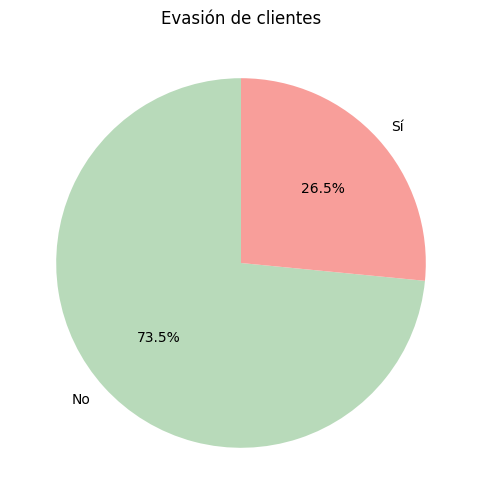

In [87]:
plt.figure(figsize=(12,6))
clientes_filtrados['Evasión'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#B8DABA','#F89E9A'], startangle=90)
plt.title('Evasión de clientes')
plt.ylabel('')
plt.show()

In [88]:
#plt.figure(figsize=(12,6))
#colores = {'No':'#B8DABA','Sí':'#F89E9A'}
#sns.countplot(data=clientes_filtrados, x='Género', hue='Evasión', palette=colores)
#plt.title('Evasión por género')
#plt.xlabel('Género')
#plt.ylabel('Cantidad de clientes')
#plt.show()

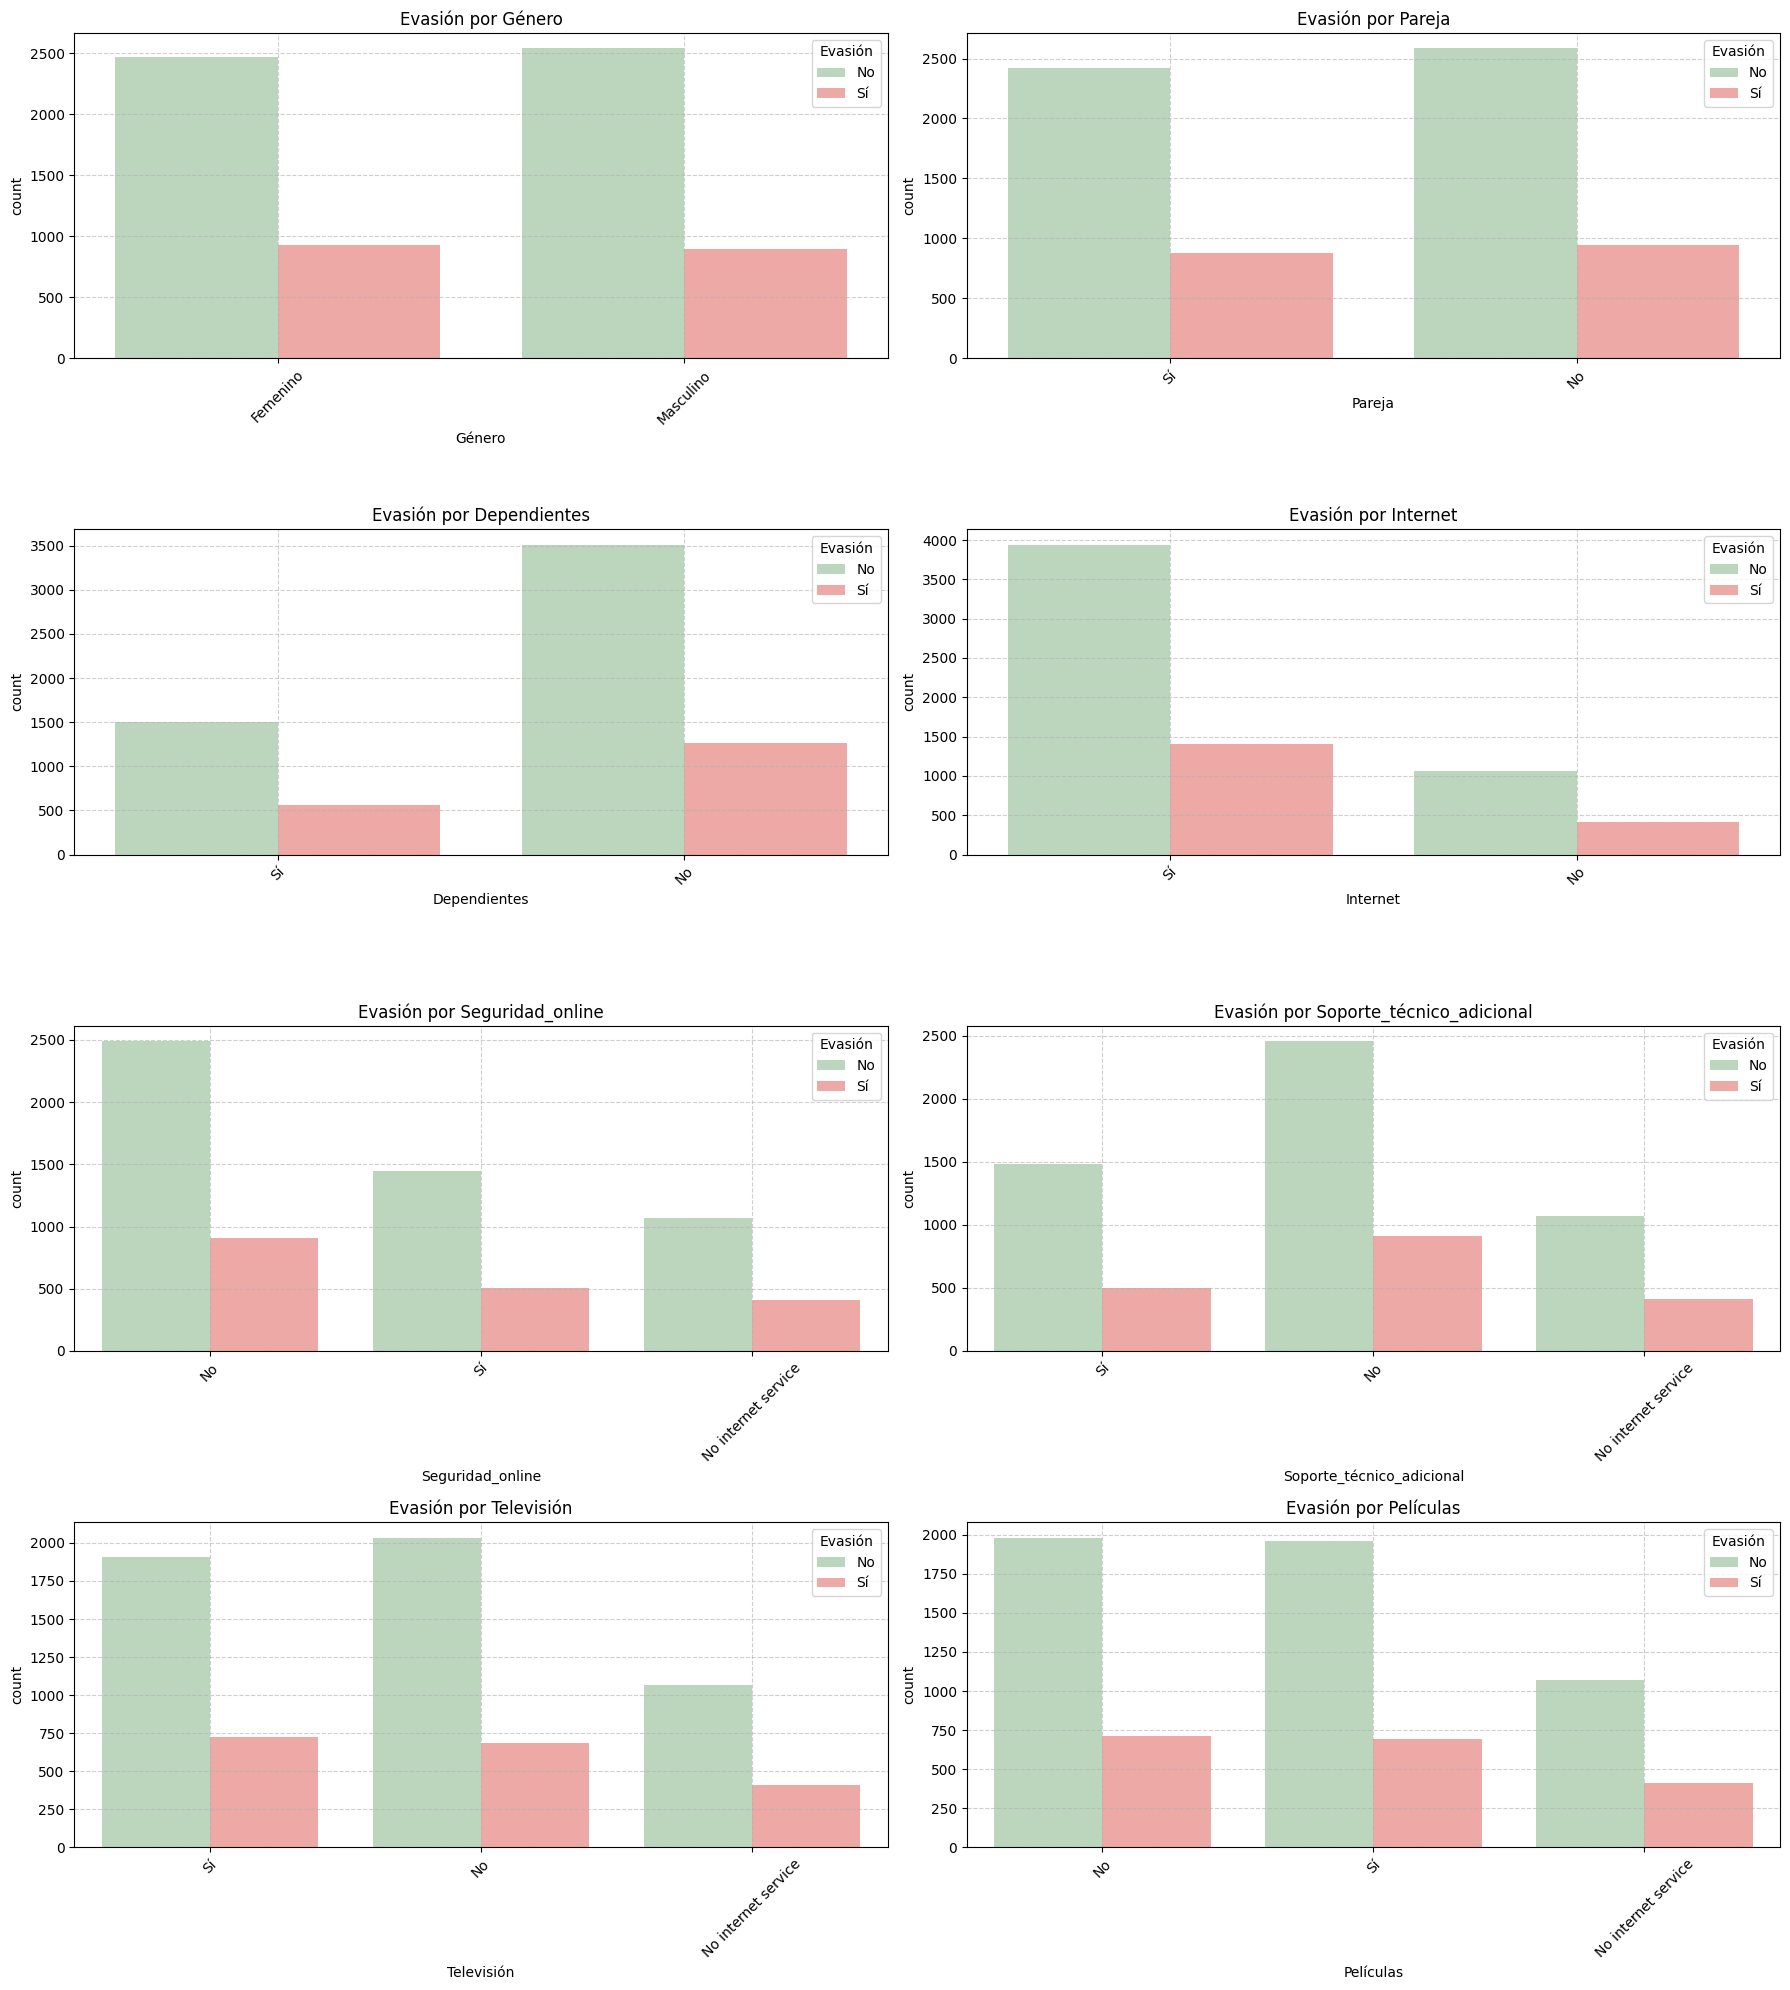

In [89]:
variables = ['Género', 'Pareja', 'Dependientes', 'Internet', 'Seguridad_online', 'Soporte_técnico_adicional', 'Televisión', 'Películas']
colores = {'No':'#B8DABA','Sí':'#F89E9A'}

fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.countplot(data=clientes_filtrados, x=var, hue='Evasión', palette=colores, ax=axes[i])
    axes[i].set_title(f'Evasión por {var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1618108327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_filtrados, x='Evasión', y=col, palette=colores, ax=axes[i], errorbar=None)
/tmp/ipython-input-1618108327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_filtrados, x='Evasión', y=col, palette=colores, ax=axes[i], errorbar=None)
/tmp/ipython-input-1618108327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_filtrados, x='Evasión', y=col, palette=colores, ax=axes[i], errorbar=None)
/tmp/ipython-input-1618108327.py:8

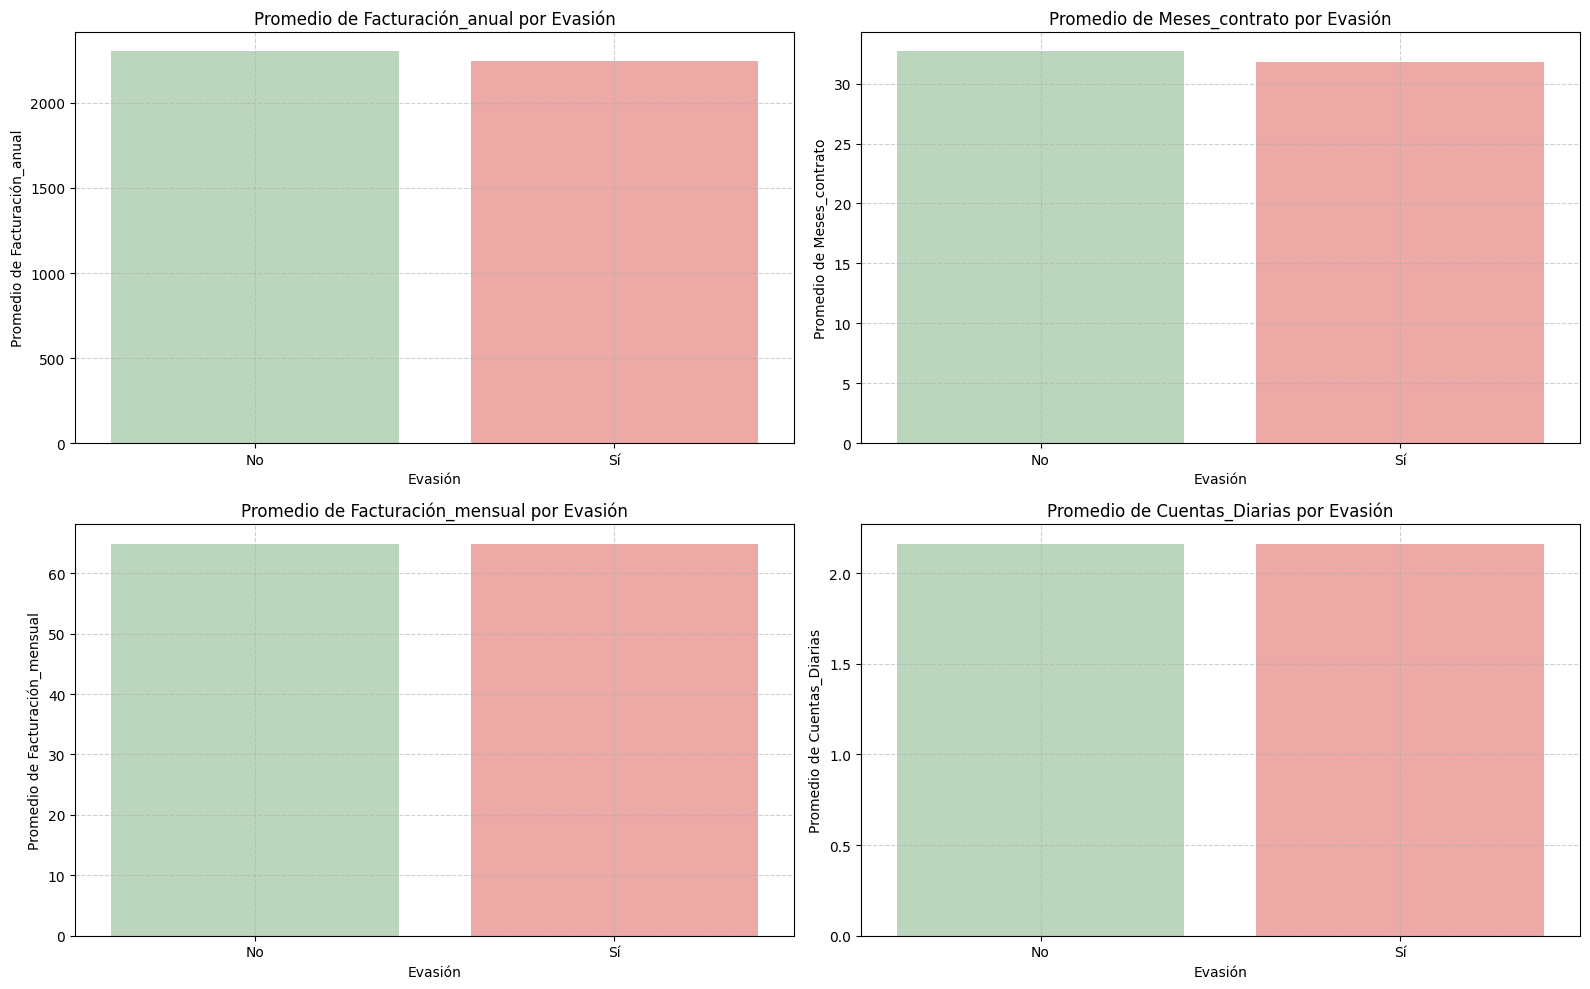

In [90]:
variables_numericas = ['Facturación_anual', 'Meses_contrato', 'Facturación_mensual', 'Cuentas_Diarias']
colores = {'No': '#B8DABA', 'Sí': '#F89E9A'}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.barplot(data=clientes_filtrados, x='Evasión', y=col, palette=colores, ax=axes[i], errorbar=None)
    axes[i].set_title(f'Promedio de {col} por Evasión')
    axes[i].set_xlabel('Evasión')
    axes[i].set_ylabel(f'Promedio de {col}')
    axes[i].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

# **Informe final**

El objetivo del análisis anterior se centra en conocer los motivos gran cantidad de personas están cancelando el servicio, de esta m,anera hacer lo posible por erradicar la pérdida de los clientes de Telecom X.

Después de una recopilación de distinta información, se pudo lograr este análisis, claro que sin antes tener legibles los datos. Se realizó un alimpieza de datos, es decir, se conservaron los más relevantes y se trataron para un mejor análisis.

Rescatando de esta manera que un 26.5% de los clientes habían cancelado el servicio, en el cual, la mayoría son persons del sexo femenino, solteros, dependientes de otras personas y además cuentan con cancelación en otros servicios como lo es internet y televisión. Además de que son las personas que gastan menos al menos.

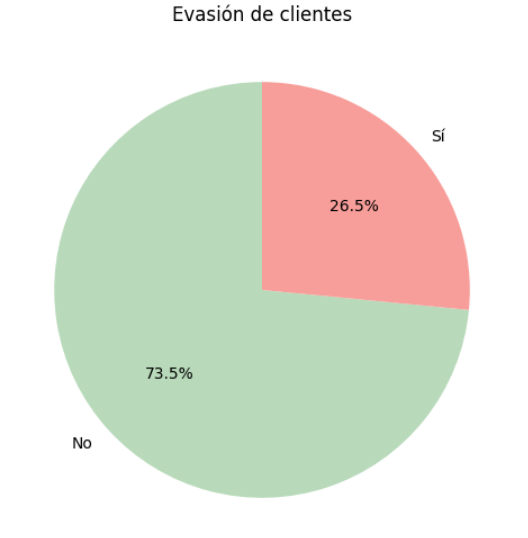

Con esto último podemos concluir que el factor económico puede intervenir bastante, ya que aunque no es brutal la diferencia entre gastos de las personas que cancelaron o no el servicio, se puede deducir que si gastan menos quiere decir que tienen algunas limitantes o son algo ahorrativos, junto con los demás factores. De esta manera se pueden ejecutar algunas estrategias junto con un análisis más a fondo de costo de venta y cantidad de ventas, así ver si es conveniente y quizá ofertar algunas otras opciones de servicios.
